In [1]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier #ShapeDTW
#from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
dataset = "beef"
f = np.loadtxt(f"Smoothed/{dataset}_smoothed.csv", delimiter=",")
ts = f[:, 1:]
labels = f[:, 0]

In [3]:
def dtwaccuracy(m):
    X = np.zeros_like(ts)
    col = ts.shape[0]
    N = ts.shape[1]
    
    for i in range(0,col):
        w = X[i, :]
        y = ts[i, :]
        
        w[0] = y[0]
        w[1] = y[1]
        for k in range(2, N):
            w_inert = w[k-1] * 2 - w[k-2]
            w[k] = w_inert + (y[k] - w_inert)/m
        
        X[i, :] = w
    
    X_train, X_test, y_train, y_test = train_test_split(X, labels)
    classifier = KNeighborsTimeSeriesClassifier(distance="euclidean")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    return accuracy_score(y_test, y_pred)

In [7]:
masses = np.arange(5,101, 5)
accuracy = np.zeros(20)

i = 0
for m in masses:
    accuracy[i] = np.mean([dtwaccuracy(m), dtwaccuracy(m), dtwaccuracy(m), dtwaccuracy(m), dtwaccuracy(m)])
    i += 1
    

Text(0.5, 1.0, 'Adiac')

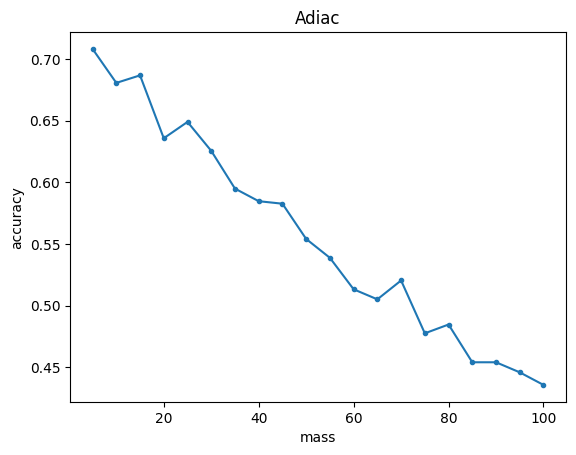

In [8]:
plt.clf()
plt.plot(masses, accuracy, ".-")
plt.xlabel("mass")
plt.ylabel("accuracy")
plt.title(dataset)

In [ ]:
np.mean(accuracy)

In [ ]:
dtwaccuracy(5)